<a href="https://colab.research.google.com/github/M1croZavr/ML_opt/blob/master/User_interface_notebook_regression_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/M1croZavr/ML_opt.git

Cloning into 'ML_opt'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 400 (delta 194), reused 211 (delta 80), pack-reused 0
Receiving objects: 100% (400/400), 17.13 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [2]:
cd ML_opt/

/content/ML_opt


In [11]:
from regression import models
import numpy as np

# Модель линейной регрессии 

In [15]:
# Задать необходимые значения X и Y
X, y = datasets.make_regression(25000, 2, noise=0.4, n_informative=1)

In [16]:
def inputData():
  usereg = bool(int(input('Should we use a regularization? , 1 - yes, 0 - no: ')))
  if usereg:
    regtype=str(input('Enter the type of regularization: l1, l2: '))
  else:
    regtype=None
  plotdraw = bool(int(input('Should we draw a plot , 1 - yes, 0 - no: ')))
  dopparam=bool(int(input('Should we change const parameters? , 1 - yes, 0 - no: ')))
  if dopparam:
    lrd=float(input('Enter the Learning rate in SGD, default=0.01:'))
    epsd=float(input('Enter the Convergence condition coefficient in SGD, default=0.05:'))
    if usereg:
      cd=float(input('Enter the Regularization coefficient if regularization is provided, default=0.01:'))
  else:
    lrd=0.01
    epsd=0.05
    cd=0.01
  return regtype,plotdraw,lrd,epsd,cd

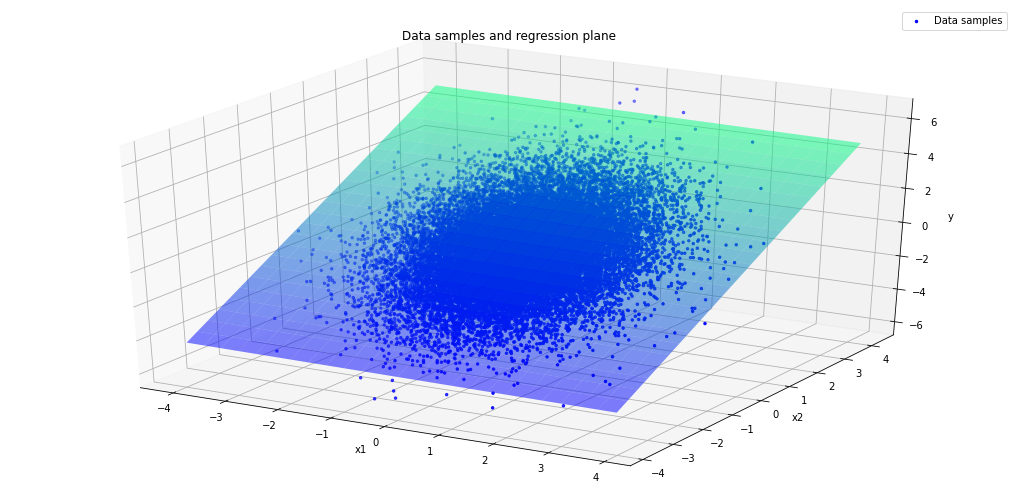

y = -0.003549461752709427 + -0.02685805595634286x1 + 1.1518497314359648x2


In [17]:
# Воспользуйтесь API класса
model = models.LinearRegression('l1', 0.01, c=0.3, plot=True)
model.fit(X, y)
print(model)

Should we use a regularization? , 1 - yes, 0 - no: 1
Enter the type of regularization: l1, l2: l1
Should we draw a plot , 1 - yes, 0 - no: 1
Should we change const parameters? , 1 - yes, 0 - no: 0


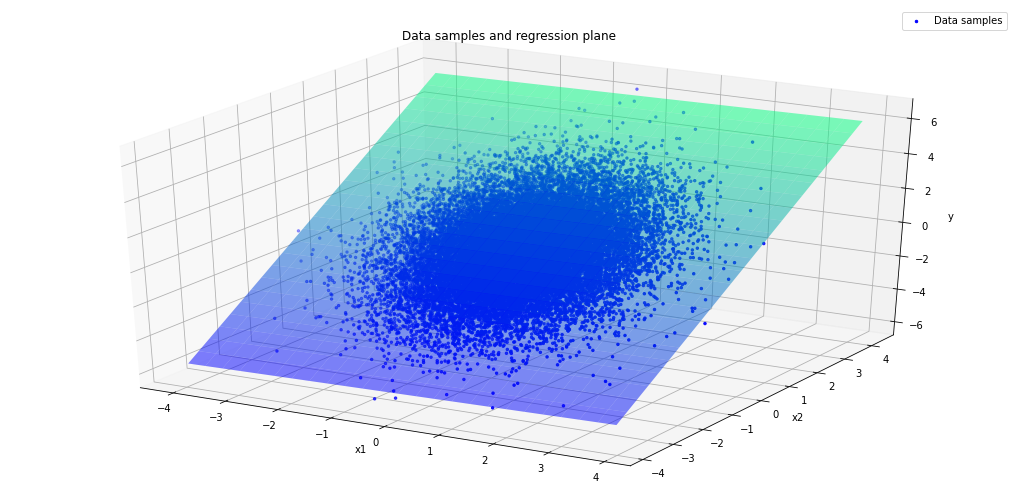

Analytical view: y = -0.04939767620826619 + 0.04013118854558231x1 + 1.3972552568621204x2
Regressors weights [0.04013119 1.39725526]
Intercept of the regression -0.04939767620826619


In [18]:
# Или воспользуйтесь ячейкой
regtype, plot, lr, eps, c = inputData()
model = models.LinearRegression(regtype, lr=lr, eps=eps, c=c, plot=plot).fit(X, y)
print('Analytical view:', str(model))
print('Regressors weights', model.w[1:])
print('Intercept of the regression', model.w[0])

# Модель полиномиальной регрессии

In [26]:
# Задаем тренировочные данные
X = np.random.uniform(1, 10, (15000, 2))
y = np.sin(X[:, 0]) + np.cos(X[:, 1])

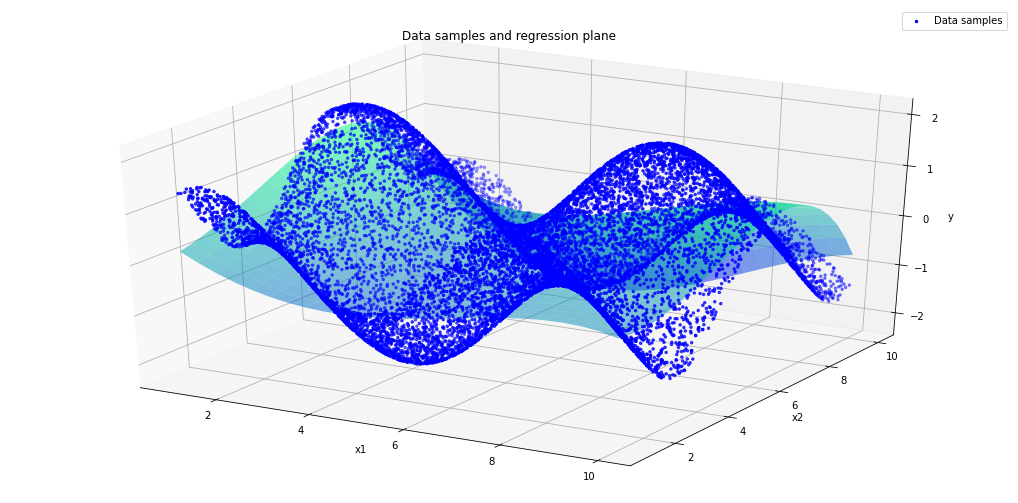

y = 0.03954953059542113 + -1.510614779455095x1 + 0.23147656053138532x2 + 1.8477687260805025x3 + -1.1591832295572564x4 + 1.427818018367082x5 + 1.2857071127088673x6 + 0.5963805977032143x7 + 0.25210261761565983x8 + 0.07122169970242405x9 + -1.5387888506731608x10 + -0.33816429673721615x11 + 0.900363068011109x12 + -0.549847003602201x13 + -1.6237312303353888x14


In [28]:
# Воспользуйтесь API класса, обучите модель
model = models.PolynomialRegression(degree=4, plot=True)
model.fit(X, y)
print(model)

# Модель экспоненциальной регрессии

In [38]:
# Задаем тренировочные данные
X = np.random.uniform(1, 3, (10000, 2))
y = np.exp(X[:, 0]) + np.random.randn(X[:, 0].shape[0]) * 0.1

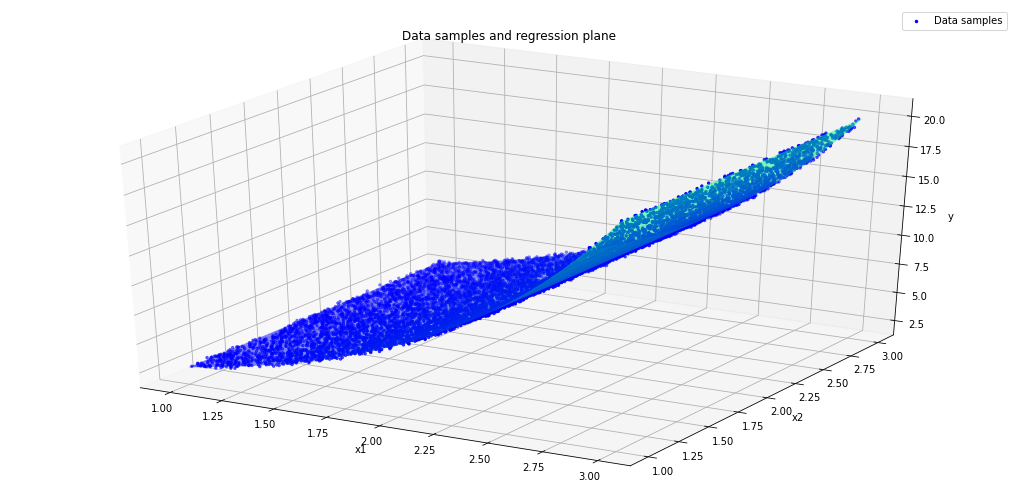

y = 0.9992520542109679 * 2.718840353756729 ** x1 * 1.0001101826904926 ** x2


In [39]:
# Воспользуйтесь API класса, обучите модель
model = models.ExpRegression('l2', plot=True)
model.fit(X, y)
print(model)